### 机器学习概念
有监督学习 vs 无监督学习

1. 有监督学习表示有人类介入的机器学习，需要人为的给数据打标签，进行分类或者回归预测，但是在异常检测场景中人类无法确认哪些登录行为是异常的，无法打标，所以采用无监督学习

批量学习 vs 在线学习
1. 批量学习指的是先进行模型学习，然后定时发布一个模型上线，在一天或一周时间内，将攒的数据进行统一的一次学习，替换原先的模型进行使用。缺点是，每次都是全量的学习，非常的损耗资源和时间，对于资源紧缺或者更新要求非常频繁(股票价格)的系统来说这是难以接受的。
2. 在线学习指的是每次都可以循序渐进的给小部分或者单独的数据进行增量的学习，这样就可以根据写入的数据进行快速更新
3. 当前可以拿到历史数据，因此比较好的思路是先批量学习出一个模型，评估好效果之后发布上线使用，之后这个模型能够在线学习，或者重新在线学习一个新模型逐步替代批量的模型。
4. 在线学习的弊病是如果给系统传入了大量不良数据，那么系统的性能会逐渐下降，比如恶意刷屏提升搜索结果排名。需要进行性能监控，当模型性能出现下降就应该停止学习，甚至可能需要回滚到之前的状态。

泛化
1. 基于机器学习系统，对未出现过的实例进行预测，这个过程称为泛化

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = ".."
CHAPTER_ID = "fundamentals"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "img", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### 一个关于GDP和幸福度相关关系的机器学习示例

[[5.96242338]]


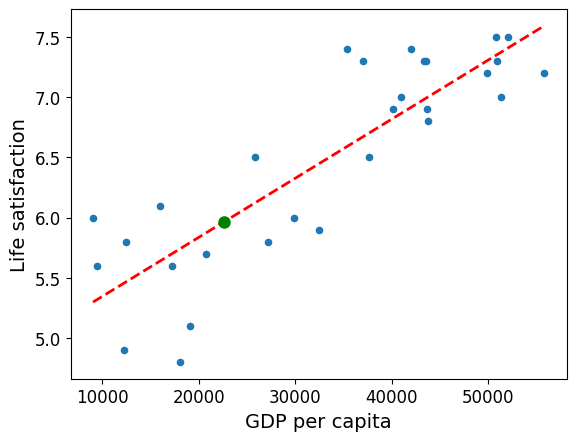

In [28]:
import pandas as pd
import sklearn.linear_model

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

# Load the data
oecd_bli = pd.read_csv("../dataset/oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("../dataset/gdp_per_capita.csv",thousands=',',delimiter='\t',
                          encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

# Select a linear model
model = sklearn.linear_model.LinearRegression()
# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus's GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

predictX = np.linspace(X.min(), X.max(), 100)
# 每一行变成一列,有n行
#print(predictX.reshape(-1, 1))
# 每一行变成n列,有1行
#print(predictX.reshape(1, -1))

#这里由于需要的是一个二维数组,每个元素是一个X用于预测
predictX = predictX.reshape(-1, 1)
predictResultY = model.predict(predictX)
# plt.plot方法中第一个二维数组每个元素表示一个x坐标,第二个二维数组中每个元素表示一个y坐标,整体就是将这些点给在图中绘制出来
plt.plot(predictX, predictResultY, "r--", linewidth=2)

#matplotlib描点
plt.plot(X_new[0][0], model.predict(X_new)[0][0], color='green', marker='o', markersize=8, linestyle='')

plt.show()

### 线性回归转k近邻

k近邻的含义是找到和该特征相近的数据点，取这些数据点的实际值进行求平均得到该点的预测值

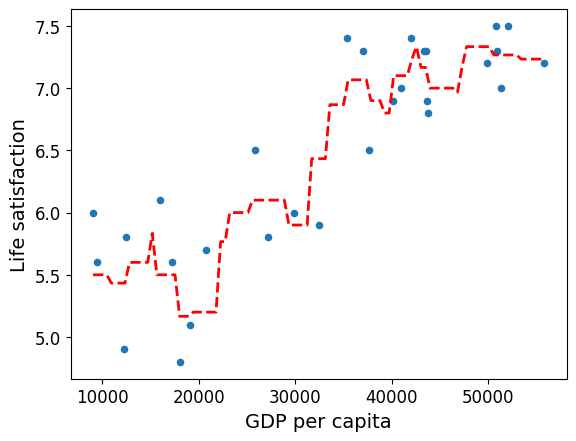

In [30]:
import sklearn.neighbors

country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
model.fit(X, y)
predictResultY = model.predict(predictX)
plt.plot(predictX, predictResultY, "r--", linewidth=2)
plt.show()